# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [67]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/Users/darioholenstein/Documents/zhaw/data-analytics/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [68]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                        'address_raw',
                                                        'lat',
                                                        'lon',
                                                        'bfs_number',
                                                        'bfs_name',
                                                        'rooms', 
                                                        'area', 
                                                        'luxurious', 
                                                        'price', 
                                                        'price_per_m2',
                                                        'pop',
                                                        'pop_dens',
                                                        'emp',
                                                        'frg_pct',
                                                        'mean_taxable_income']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Quantiles original values

In [69]:
df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1337.00,1.00,26.00,17.90,336.03
0.10,1492.50,1.50,41.50,20.02,525.66
0.25,1842.25,2.50,63.00,23.30,1044.63
0.50,2391.00,3.50,86.00,27.95,1662.60
0.75,3056.75,4.50,108.75,38.12,4778.99
0.90,3960.00,4.75,140.50,52.78,4778.99
0.95,4957.50,5.50,163.75,67.33,4778.99


### Remove Outliers

In [70]:
q1 = df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.25]).round(2)
q3 = df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.75]).round(2)
print(q1)
print(q3)

iqr = q3.reset_index(drop=True) - q1.reset_index(drop=True)
print(iqr)

lower_end = q1.reset_index(drop=True) - 1.5*iqr.reset_index(drop=True)
print(lower_end)

higher_end = q3.reset_index(drop=True) + 1.5*iqr.reset_index(drop=True)
print(higher_end)

mask = (
    (df_orig['price'] < lower_end['price'].iloc[0]) | (df_orig['price'] > higher_end['price'].iloc[0]) |
    (df_orig['rooms'] < lower_end['rooms'].iloc[0]) | (df_orig['rooms'] > higher_end['rooms'].iloc[0]) |
    (df_orig['area'] < lower_end['area'].iloc[0]) | (df_orig['area'] > higher_end['area'].iloc[0]) |
    (df_orig['price_per_m2'] < lower_end['price_per_m2'].iloc[0]) | (df_orig['price_per_m2'] > higher_end['price_per_m2'].iloc[0]) |
    (df_orig['pop_dens'] < lower_end['pop_dens'].iloc[0]) | (df_orig['pop_dens'] > higher_end['pop_dens'].iloc[0])
)

df_orig_no_outliers = df_orig[~mask]
print(df_orig_no_outliers)

        price  rooms  area  price_per_m2  pop_dens
0.25  1842.25    2.5  63.0          23.3   1044.63
        price  rooms    area  price_per_m2  pop_dens
0.75  3056.75    4.5  108.75         38.12   4778.99
    price  rooms   area  price_per_m2  pop_dens
0  1214.5    2.0  45.75         14.82   3734.36
   price  rooms   area  price_per_m2  pop_dens
0   20.5   -0.5 -5.625          1.07  -4556.91
    price  rooms     area  price_per_m2  pop_dens
0  4878.5    7.5  177.375         60.35  10380.53
    web-scraper-order                                 address_raw        lat  \
0        1693998201-1           Neuhusstrasse 6, 8630 Rüti ZH, ZH  47.252171   
1      1693998233-172         Widacherstrasse 5, 8630 Rüti ZH, ZH  47.252087   
2      1693998256-331               Widenweg 14, 8630 Rüti ZH, ZH  47.253670   
3      1693998265-381                    Rain 1, 8630 Rüti ZH, ZH  47.259834   
4      1693998276-419        Bachtelstrasse 24b, 8630 Rüti ZH, ZH  47.266113   
..                ... 

### Filter apartments

In [71]:
# Filter apartments (replace '<= 5000' by the respective operator and quantile)
df = df_orig.loc[df_orig['pop_dens'] <= df_orig['pop_dens'].quantile(0.1)]
print(df)

    web-scraper-order                                 address_raw        lat  \
6        1693998201-2          Zürcherstrasse 1, 8173 Neerach, ZH  47.513332   
7      1693998236-198        Vogtmühlestrasse 2, 8173 Neerach, ZH  47.510445   
8      1693998252-293        Vogtmühlestrasse 2, 8173 Neerach, ZH  47.510445   
9      1693998261-350      Steinmaurstrasse 19B, 8173 Neerach, ZH  47.511902   
287     1693998205-27      Kanzleistrasse 15, 8418 Schlatt ZH, ZH  47.464199   
..                ...                                         ...        ...   
778    1693998335-749            Poststrasse 61, 8462 Rheinau, ZH  47.640228   
782    1693998364-896  Langenmattstrasse 14, 8617 Mönchaltorf, ZH  47.315971   
783    1693998369-919      Oberalbis 10, 8915 Hausen am Albis, ZH  47.252140   
784    1693998373-960          Isikerstrasse 26, 8335 Hittnau, ZH  47.370026   
785    1693998381-998            Tösstalstrasse 12, 8492 Wila, ZH  47.421207   

          lon  bfs_number         bfs_n

### Shape (number of rows and colums)

In [72]:
# Number of rows and columns
print(df.shape)

(82, 16)


### Data types

In [73]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [74]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.0,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,47.470294,8.642746,122.317073,4.298780,122.475610,0.0,2507.768293,22.278659,3824.975610,337.728090,1253.658537,15.928125,80684.996631
std,0.115097,0.163193,84.489298,1.082577,66.532685,0.0,638.787534,5.197925,2618.720336,129.587613,1482.011848,5.409392,12000.353701
min,47.224941,8.367652,1.000000,1.500000,46.000000,0.0,1420.000000,5.560000,698.000000,87.959866,144.000000,7.547170,62000.541872
25%,47.399567,8.476024,58.000000,3.500000,91.250000,0.0,2000.000000,19.132500,2247.000000,264.316615,497.000000,13.316640,72133.750580
50%,47.506889,8.663308,100.000000,4.500000,109.000000,0.0,2435.000000,22.355000,3175.000000,343.974961,833.500000,14.776057,77263.937785
75%,47.543964,8.795939,207.250000,5.250000,134.500000,0.0,2850.000000,25.230000,4873.000000,448.613139,1321.750000,18.909124,86142.668078
max,47.675091,8.915933,298.000000,6.500000,585.000000,0.0,4600.000000,35.000000,11277.000000,525.662252,6999.000000,27.126628,111422.358722


### Summary statistics of numeric values w/o outliers

In [75]:
df_orig_no_outliers.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,47.410431,8.606862,180.626647,3.404832,86.814056,0.008785,2413.276720,29.626984,139078.966325,2312.418252,150372.755490,27.520517,79513.215477
std,0.087779,0.121722,81.738136,1.149598,31.247320,0.093383,788.665282,9.366258,177273.522497,1676.514172,212165.032501,7.667479,13049.549801
min,47.195290,8.367652,1.000000,1.000000,8.000000,0.000000,86.000000,10.750000,698.000000,87.959866,129.000000,7.669214,62000.541872
25%,47.360123,8.515394,116.000000,2.500000,65.000000,0.000000,1830.000000,23.205000,8689.000000,1005.934343,2910.000000,24.214524,70118.996920
50%,47.400776,8.572907,219.000000,3.500000,86.000000,0.000000,2335.000000,27.000000,24990.000000,1662.597326,18911.000000,27.325217,79184.009112
75%,47.485901,8.718418,261.000000,4.500000,105.000000,0.000000,2900.000000,33.885000,420217.000000,4778.994655,491193.000000,32.458468,82932.737704
max,47.693893,8.915933,298.000000,6.500000,177.000000,1.000000,4860.000000,59.380000,420217.000000,4778.994655,491193.000000,46.226483,174434.537050


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [76]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 82 Min: 1420.0 Max: 4600.0 Mean: 2507.8 Median: 2435.0 Std: 638.8
Area: Count: 82 Min: 46.0 Max: 585.0 Mean: 122.5 Median: 109.0 Std: 66.5


### Skewness

In [77]:
df[['price','rooms', 'area']].skew()

price    0.591020
rooms   -0.068836
area     4.481491
dtype: float64

### Kurtosis

In [78]:
df[['price','rooms', 'area']].kurtosis()

price     0.189341
rooms    -0.214789
area     28.699022
dtype: float64

### Extreme values

In [79]:
# Low costs apartments
df[df['price_per_m2'] <= 10]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
762,1693998280-447,"Grabenwiese 2, 8484 Weisslingen, ZH",47.426781,8.767586,180,Weisslingen,6.5,585.0,0,3250.0,5.56,3364,262.607338,886.0,10.434007,84173.291925


In [80]:
# Very expansive apartments
df[df['price_per_m2'] >= 100]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income


### Get a list of categories of categorical variable

In [81]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Aeugst am Albis', 'Altikon', 'Andelfingen', 'Bauma', 'Brütten',
       'Dättlikon', 'Elsau', 'Freienstein-Teufen', 'Glattfelden',
       'Hausen am Albis', 'Hinwil', 'Hittnau', 'Hochfelden', 'Knonau',
       'Laufen-Uhwiesen', 'Lindau', 'Lufingen', 'Mettmenstetten',
       'Mönchaltorf', 'Neerach', 'Neftenbach', 'Niederweningen',
       'Ossingen', 'Rheinau', 'Rickenbach (ZH)', 'Russikon',
       'Schlatt (ZH)', 'Stadel', 'Stallikon', 'Steinmaur', 'Trüllikon',
       'Wald (ZH)', 'Weiach', 'Weisslingen', 'Wiesendangen', 'Wila',
       'Zell (ZH)'], dtype=object)

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [82]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.5,6.0,6.5
luxurious,,,,,,,,,,
0,1,1,6,1,22,2,28,16,1,4


### Pivot tables

In [83]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.5   0             1   46.000000     1  1420.000000            1  30.870000
2.0   0             1   72.000000     1  1850.000000            1  25.690000
2.5   0             6   67.500000     6  1825.000000            6  27.503333
3.0   0             1   70.000000     1  2450.000000            1  35.000000
3.5   0            22   93.454545    22  2159.318182           22  23.315909
4.0   0             2  165.000000     2  2490.000000            2  15.510000
4.5   0            28  116.285714    28  2555.750000           28  22.345000
5.5   0            16  154.750000    16  3126.937500           16  20.752500
6.0   0             1  220.000000     1  2800.000000            1  12.730000
6.5   0             4  278.000000     4  3022.500000            4  13.967500

### Correlation matrix

In [84]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.996585,0.997840,-0.693560,-0.294489,-0.978187
area,0.996585,1.000000,0.989859,-0.745792,-0.321400,-0.978778
price,0.997840,0.989859,1.000000,-0.645358,-0.243884,-0.966425
price_per_m2,-0.693560,-0.745792,-0.645358,1.000000,0.679270,0.766081
pop_dens,-0.294489,-0.321400,-0.243884,0.679270,1.000000,0.484238
frg_pct,-0.978187,-0.978778,-0.966425,0.766081,0.484238,1.000000


### Covariance matrix

In [85]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.171974,44.405525,436.224405,-2.930397,-19.024296,-1.816317
area,44.405525,4426.598163,24287.062180,-223.455527,-1196.619105,-91.148061
price,436.224405,24287.062180,408049.513550,-230.358216,-642.371430,-1086.768107
price_per_m2,-2.930397,-223.455527,-230.358216,27.018427,141.020202,2.443707
pop_dens,-19.024296,-1196.619105,-642.371430,141.020202,16792.949388,311.448224
frg_pct,-1.816317,-91.148061,-1086.768107,2.443707,311.448224,29.261519


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

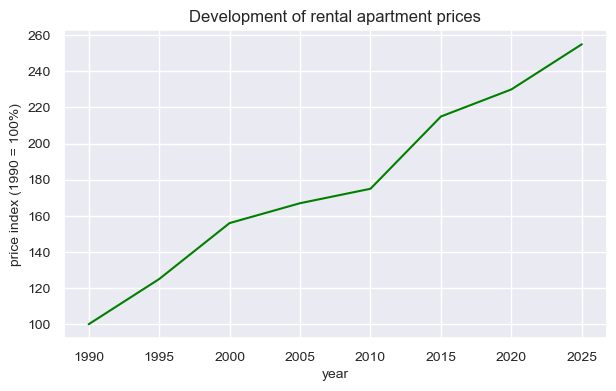

In [86]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='price_per_m2'>

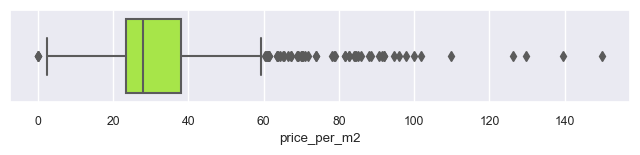

In [130]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['price_per_m2'], color="greenyellow")

### Histogram  (matplotlib)

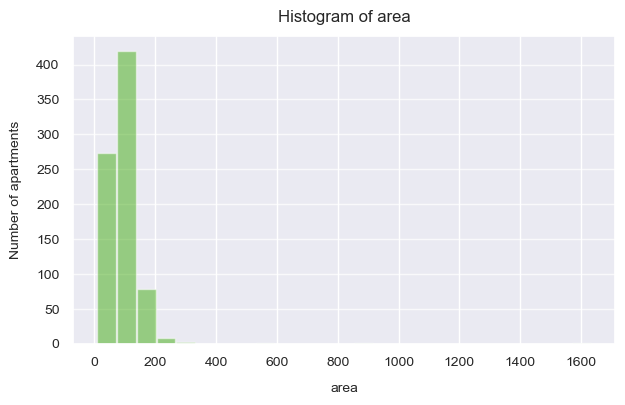

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['area'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('area', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of area', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

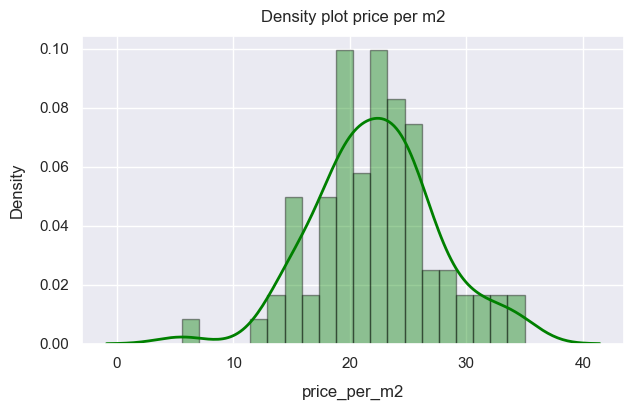

In [89]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

      area       var
671   46.0 -1.149444
747   55.0 -1.014172
708   60.0 -0.939021
6     65.0 -0.863870
294   67.0 -0.833810
..     ...       ...
670  220.0  1.465812
687  227.0  1.571023
291  240.0  1.766416
686  270.0  2.217322
762  585.0  6.951837

[82 rows x 2 columns]


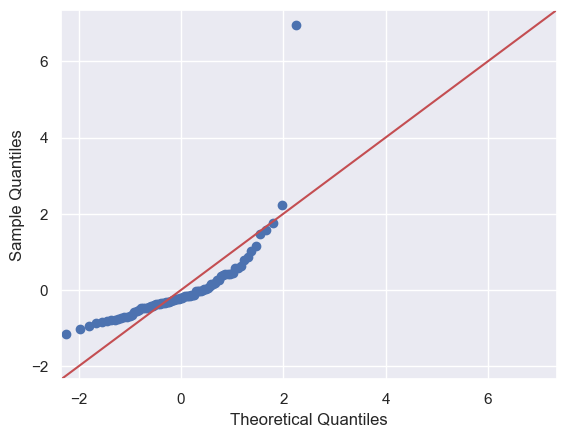

In [90]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [91]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[3.0, 6.0, 1.5, 2.0, 4.0, 6.5, 2.5, 5.5, 3.5, 4.5]

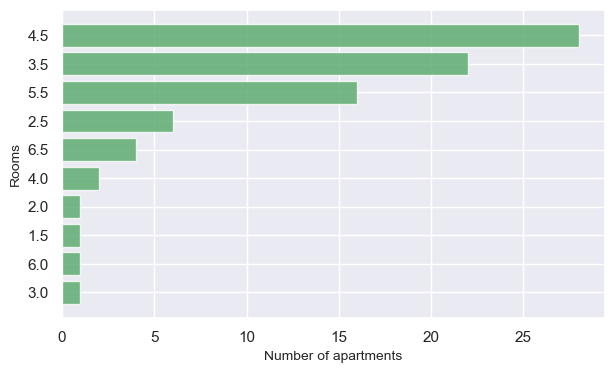

In [92]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

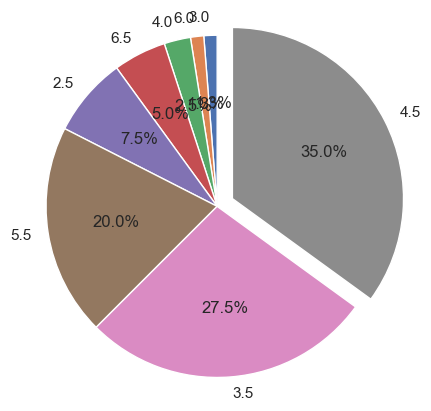

In [93]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

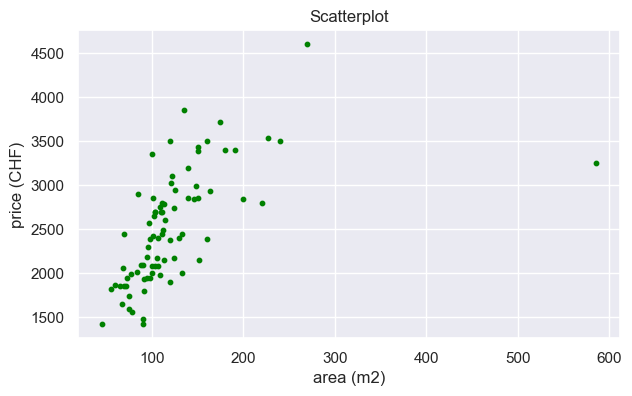

In [94]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(82, 17)
5.486620037470922
1835.7911580936534


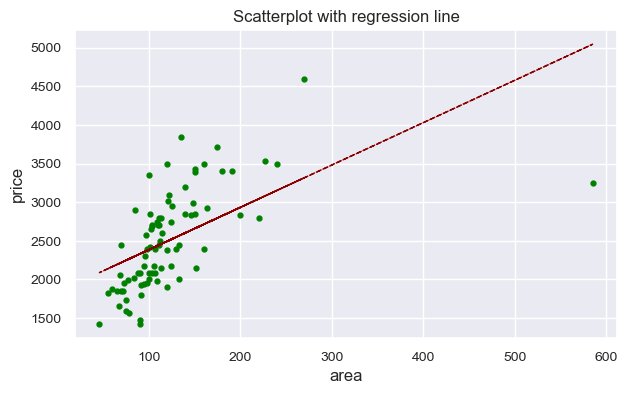

In [95]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

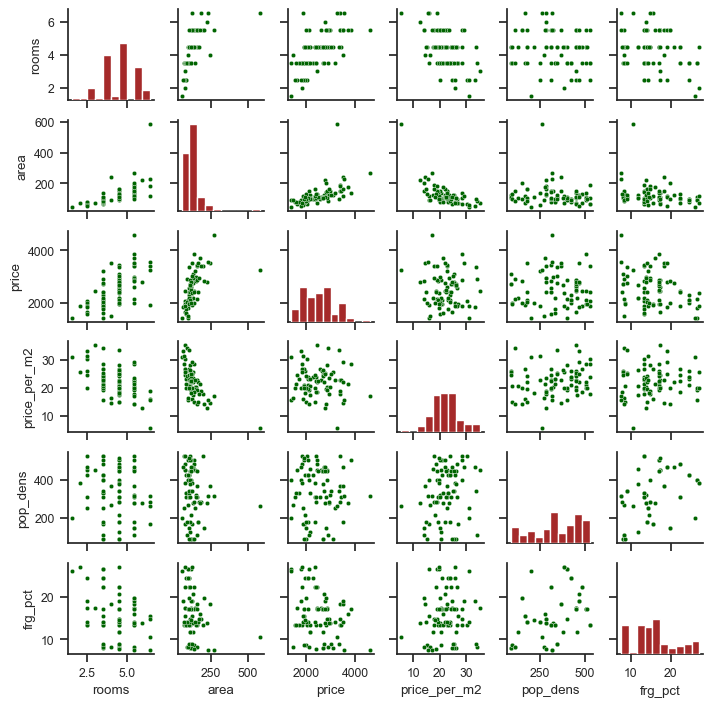

In [96]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(77, 17)


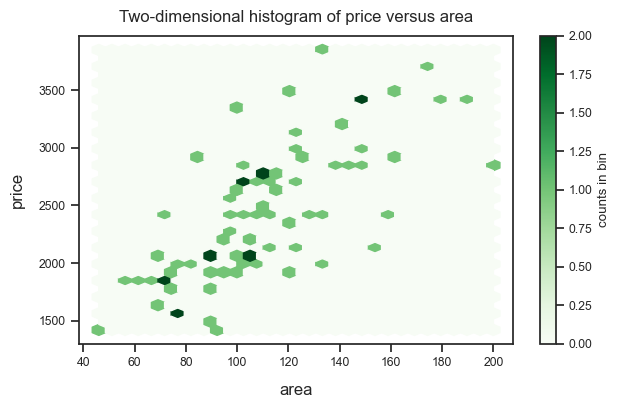

In [97]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

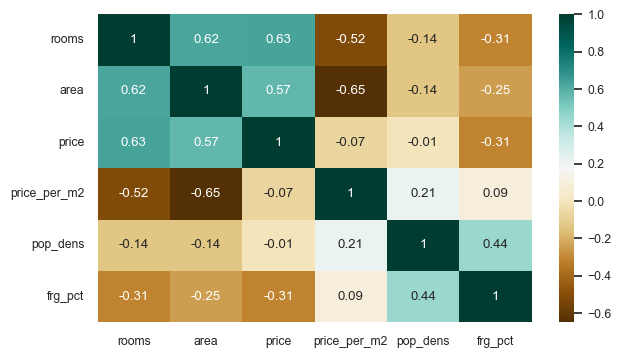

In [98]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

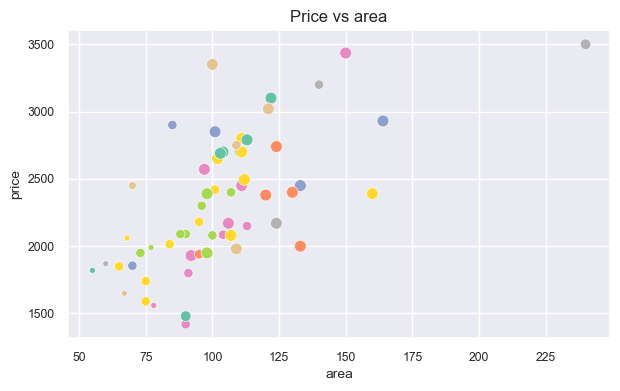

In [99]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [100]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 24.0.0
Datetime: 2024-10-21 16:28:34
Python Version: 3.11.5
-----------------------------------
